In [10]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#load ranking data and inspect them
rankings_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
rankings_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(rankings_wood.head())
print(rankings_steel.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

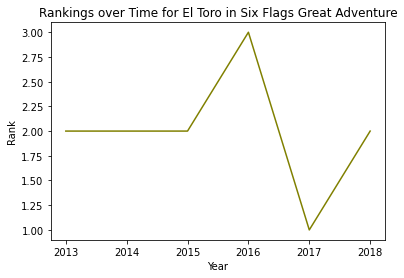

In [90]:
#Create a function to plot rankings over time for 1 roller coaster
def rankings_roller_coaster(name, park_name, df):
    y = df.Rank[(df.Name == name)&(df.Park == park_name)]
    x = df['Year of Rank'][(df.Name == name)&(df.Park == park_name)]
    plt.figure()
    ax=plt.subplot()
    plt.plot(x,y, color='olive')
    plt.title('Rankings over Time for '+str(name) +' in ' +str(park_name))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.show()

rankings_roller_coaster('El Toro', 'Six Flags Great Adventure', rankings_wood)

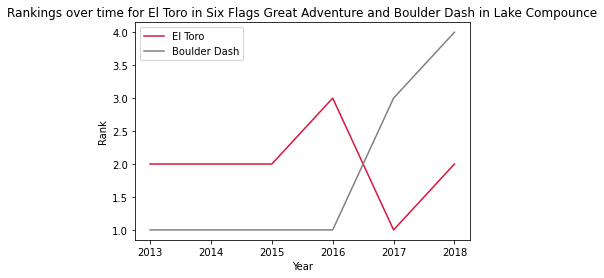

In [91]:
#Create a function that plots rankings over time for two roller coasters
def rankings_2_roller_coasters(name1, name2, park1, park2, df):
    x1 = df['Year of Rank'][(df.Name == name1)&(df.Park ==park1)]
    y1 = df.Rank[(df.Name == name1)&(df.Park ==park1)]
    x2 = df['Year of Rank'][(df.Name == name2)&(df.Park ==park2)]
    y2 = df.Rank[(df.Name == name2)&(df.Park ==park2)]
    plt.figure()
    plt.plot(x1, y1, label = name1, color='crimson')
    plt.plot(x2, y2, label = name2, color='grey')
    plt.title('Rankings over time for '+str(name1)+' in ' +str(park1)+ ' and '+str(name2) + ' in ' +str(park2))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend()
    plt.show()

rankings_2_roller_coasters('El Toro', 'Boulder Dash', 'Six Flags Great Adventure', 'Lake Compounce', rankings_wood)

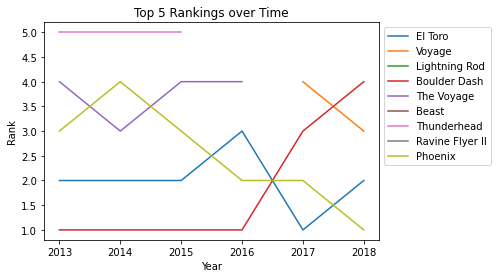

In [28]:
#Create a function to plot top n rankings over time
def top_n_roller_coasters(n, df):
    top_n_roller_coasters = df[df.Rank <= n]
    plt.figure()
    for i in set(top_n_roller_coasters.Name):
        y = top_n_roller_coasters.Rank[top_n_roller_coasters.Name == i]
        x = top_n_roller_coasters['Year of Rank'][top_n_roller_coasters.Name == i]
        plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor = (1,1))
    plt.title('Top '+str(n)  + ' Rankings over Time')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.show()

top_n_roller_coasters(5, rankings_wood)

In [53]:
#load roller coaster data and inspect them
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())


            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


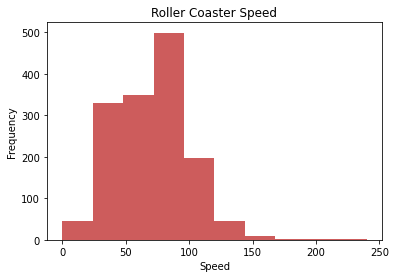

In [95]:
#Create a function to plot histogram of column values
def roller_coaster_hist(df, column):
    plt.figure()
     #remove outliers from height value
    if column == 'height':
        heights = df[df['height'] <= 140]
        plt.hist(heights[column].dropna(), color='indianred')
    else:
        plt.hist(df[column].dropna(), color='indianred')
    if column == 'num_inversions':
        plt.title('Roller Cooaster Number of Inversions')
        plt.xlabel('Number of Inversions')
    else:
        plt.title('Roller Coaster '+ str.title(column))
        plt.xlabel(str.title(column))
    plt.ylabel('Frequency')
    plt.show()

roller_coaster_hist(roller_coasters, 'speed')

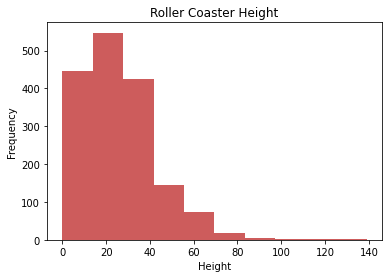

In [94]:
roller_coaster_hist(roller_coasters, 'height')

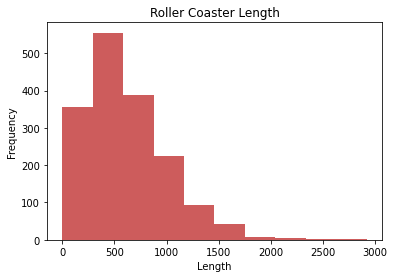

In [96]:
roller_coaster_hist(roller_coasters, 'length')

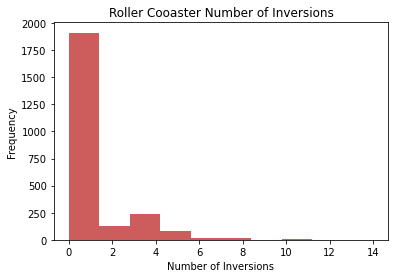

In [97]:
roller_coaster_hist(roller_coasters, 'num_inversions')

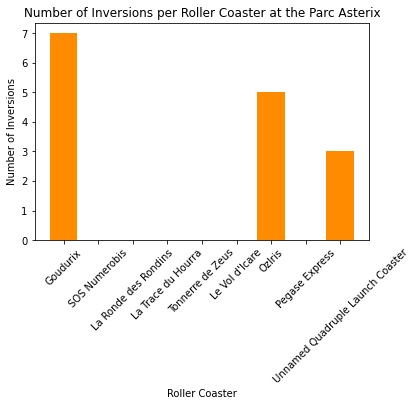

In [87]:
#Create a function to plot inversions by coaster at park
def inversions(df, park):
    y = df['num_inversions'][df.park == park]
    xlabels = df['name'][df.park == park]
    plt.figure()
    ax=plt.subplot()
    plt.bar(range(len(xlabels)),y, color='darkorange')
    plt.title('Number of Inversions per Roller Coaster at the '+str(park))
    plt.ylabel('Number of Inversions')
    plt.xlabel('Roller Coaster')
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels)
    plt.xticks(rotation=45)
    plt.show()

inversions(roller_coasters, 'Parc Asterix')

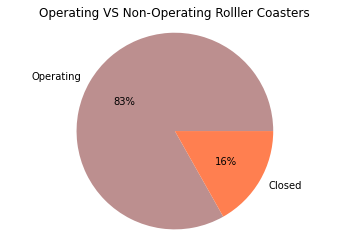

In [89]:
#Create a function to plot a pie chart of status.operating
def status_pie(df):
    operating = df[df.status == 'status.operating']
    closed = df[df.status == 'status.closed.definitely']
    status_count = [len(operating), len(closed)]
    plt.pie(status_count, labels=['Operating', 'Closed'], colors = ['rosybrown', 'coral'] ,autopct='%d%%')
    plt.axis('equal')
    plt.title('Operating VS Non-Operating Rolller Coasters')
    plt.show()

status_pie(roller_coasters)

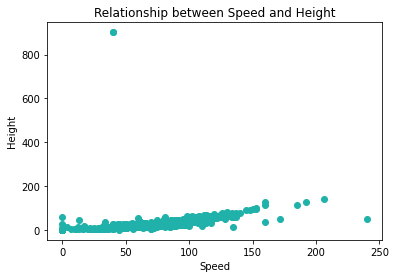

In [113]:
#Create a function to plot scatter of any two columns
def scatter(df, column1, column2):
    x = df[column1]
    y = df[column2]
    plt.scatter(x,y, color='lightseagreen', marker='o', norm=True)
    if column1 == 'num_inversions':
        plt.title('Relationship between Number of Inversions and ' +str.title(column2))
        plt.xlabel('Number of Inversions')
        plt.ylabel(str.title(column2))
    elif column2 == 'num_inversions':
        plt.title('Relationship between ' + str.title(column1)+ ' and Number of Inversions')
        plt.xlabel(str.title(column1))
        plt.ylabel('Number of Inversions')
    else:    
        plt.title('Relationship between ' + str.title(column1)+ ' and ' +str.title(column2))
        plt.xlabel(str.title(column1))
        plt.ylabel(str.title(column2))
    plt.show()
    
scatter(roller_coasters, 'speed', 'height')

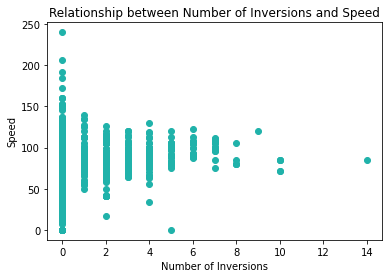

In [112]:
scatter(roller_coasters, 'num_inversions', 'speed')